In [86]:
import xarray as xr
import rioxarray
import rasterio.features
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import matplotlib.pyplot as plt

In [8]:
gdf = gpd.read_file('/Users/jonniebarnsley/Downloads/ANT_Basins_IMBIE2_v1.6(1)/ANT_Basins_IMBIE2_v1.6.shp')

In [19]:
import xarray as xr 
import rioxarray
import rasterio.features


def clip_dataset_with_shapefile(ds: xr.Dataset, gdf, lon, lat, all_touched=False) -> xr.Dataset:
    """
    Clip an xarray Dataset using a shapefile.

    Parameters:
    - ds: The input xarray Dataset.
    - shapefile: Path to the shapefile.

    Returns:
    - An xarray Dataset clipped by the shapefile.
    """
    
    ds = ds.rio.set_spatial_dims(x_dim=lon, y_dim=lat, inplace=True)

    # Convert the dataset to a rioxarray object (if it's not already)
    ds = ds.rio.write_crs(gdf.crs.to_string())
        
    # Clip the dataset
    # from rio.clip documentation:
    # all_touched : boolean, optional
    #     If True, all pixels touched by geometries will be burned in.  If
    #     false, only pixels whose center is within the polygon or that
    #     are selected by Bresenham's line algorithm will be burned in.
    ds_clipped = ds.rio.clip(gdf.geometry.apply(mapping), all_touched=all_touched)
    
    return ds_clipped


In [24]:
ismip = xr.open_dataset('/Users/jonniebarnsley/code/phd/data/ISMIP_basin_mask_8km.nc')
x = ismip.x - max(ismip.x)/2 - 4000
y = ismip.y - max(ismip.y)/2 - 4000

Nx, Ny = ismip.mask.shape

In [36]:
ones = np.ones((Nx, Ny))
ones.rio.write_crs(gdf.crs.to_string())
ones

AttributeError: 'numpy.ndarray' object has no attribute 'rio'

In [52]:
ones = xr.DataArray(data=ones, coords={'x': x, 'y':y}, dims=['x', 'y'])
#empty_ds.rio.set_spatial_dims(x_dim=x, y_dim=y, inplace=True)
ones = ones.rio.write_crs(gdf.crs.to_string())
ones

<xarray.DataArray (x: 384, y: 384)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * x            (x) float64 -3.064e+06 -3.048e+06 ... 3.048e+06 3.064e+06
  * y            (y) float64 -3.064e+06 -3.048e+06 ... 3.048e+06 3.064e+06
    spatial_ref  int64 0

In [83]:
clipped = ones.rio.clip(gdf.geometry.apply(mapping))

In [80]:
basin = gdf[gdf.index == 1]

<Axes: >

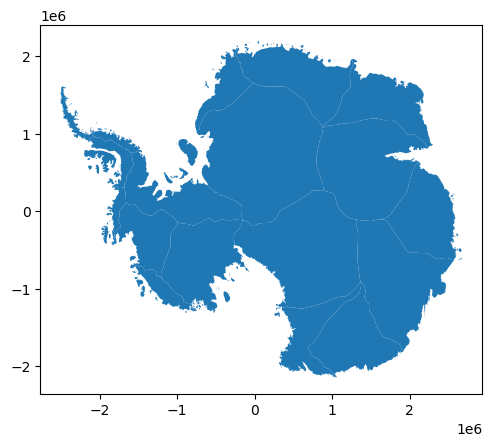

In [58]:
gdf.plot()

In [88]:
x = clipped.x
y = clipped.y
clipped

<xarray.DataArray (x: 324, y: 271)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 -2.504e+06 -2.488e+06 ... 2.648e+06 2.664e+06
  * y            (y) float64 -2.136e+06 -2.12e+06 ... 2.168e+06 2.184e+06
    spatial_ref  int64 0

In [116]:
test = clipped.interp(coords=ones.drop_vars('spatial_ref').coords, method='nearest')
test

<xarray.DataArray (x: 384, y: 384)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) float64 -3.064e+06 -3.048e+06 ... 3.048e+06 3.064e+06
  * y        (y) float64 -3.064e+06 -3.048e+06 ... 3.048e+06 3.064e+06

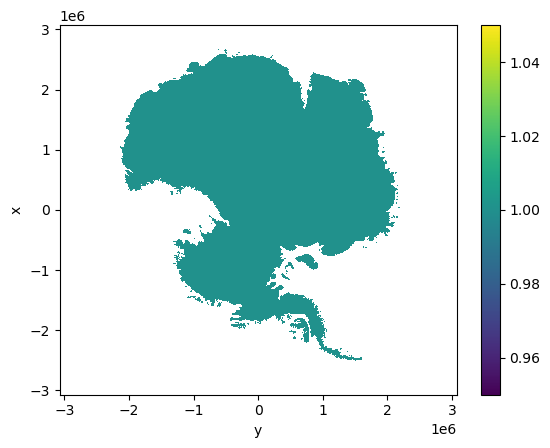

In [114]:
test.plot()

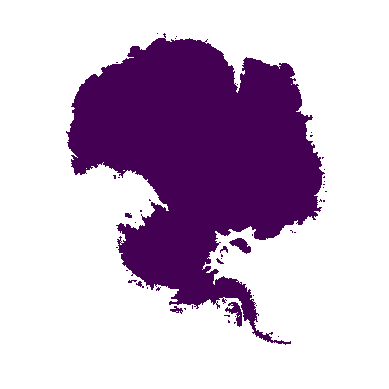

In [124]:
fig, ax = plt.subplots()

x = test.x
y = test.y

ax.pcolormesh(x, y, test)
ax.set_aspect('equal')
ax.set_axis_off()


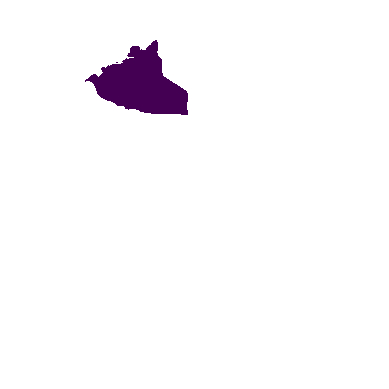

In [127]:
basin = gdf[gdf.index == 5]
clipped = ones.rio.clip(basin.geometry.apply(mapping))
test = clipped.interp(coords=ones.drop_vars('spatial_ref').coords, method='nearest')

fig, ax = plt.subplots()

x = test.x
y = test.y

ax.pcolormesh(x, y, test)
ax.set_aspect('equal')
ax.set_axis_off()
